In [33]:
import os
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
paths_to_csv = {}

In [8]:
path_tds_angles = '../../results/TSD_angles'
folders = [x[0] for x in os.walk(path_tds_angles)]
folders.remove(path_tds_angles)

In [22]:
for folder in folders:
    video_name = folder.split('\\')[-1]
    curr_paths_to_csv = [(f[:-4], os.path.join(folder, f)) for f in listdir(folder)]
    paths_to_csv[video_name] = curr_paths_to_csv

In [29]:
paths_to_csv

{'S001C': [('angl_head_inclination',
   '../../results/TSD_angles\\S001C\\angl_head_inclination.csv'),
  ('angl_left_cheek_mov',
   '../../results/TSD_angles\\S001C\\angl_left_cheek_mov.csv'),
  ('angl_left_elbow_mov',
   '../../results/TSD_angles\\S001C\\angl_left_elbow_mov.csv'),
  ('angl_left_fingers_pos_mov',
   '../../results/TSD_angles\\S001C\\angl_left_fingers_pos_mov.csv'),
  ('angl_left_hips_mov',
   '../../results/TSD_angles\\S001C\\angl_left_hips_mov.csv'),
  ('angl_left_should_mov',
   '../../results/TSD_angles\\S001C\\angl_left_should_mov.csv'),
  ('angl_left_wrist_round',
   '../../results/TSD_angles\\S001C\\angl_left_wrist_round.csv'),
  ('angl_right_cheek_mov',
   '../../results/TSD_angles\\S001C\\angl_right_cheek_mov.csv'),
  ('angl_right_elbow_mov',
   '../../results/TSD_angles\\S001C\\angl_right_elbow_mov.csv'),
  ('angl_right_fingers_pos_mov',
   '../../results/TSD_angles\\S001C\\angl_right_fingers_pos_mov.csv'),
  ('angl_right_hips_mov',
   '../../results/TSD_angle

In [73]:
# sort values to show firstly C class then I and S
names_of_videos = [v for v in paths_to_csv.keys()]
names_of_videos.sort(key=lambda v: v[::-1])
print(names_of_videos)

['S001C', 'S002C', 'S008C', 'S002I', 'S003I', 'S005I', 'S001S', 'S004S', 'S009S']


In [74]:
angles = pd.read_csv(paths_to_csv[names_of_videos[0]][0][1])['angle'].to_list()

In [75]:
num_of_metrics = len(paths_to_csv[names_of_videos[0]])

In [76]:
limits_max = np.zeros(num_of_metrics)
limits_min = [10000]*num_of_metrics
for i in range(len(names_of_videos)):
    for j in range(num_of_metrics):
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        angles = pd.read_csv(curr_path)['angle'].to_list()
        angle_max = max(angles)
        angle_min = min(angles)
        if limits_max[j] < angle_max:
            limits_max[j] = angle_max
        if limits_min[j] > angle_min:
            limits_min[j] = angle_min

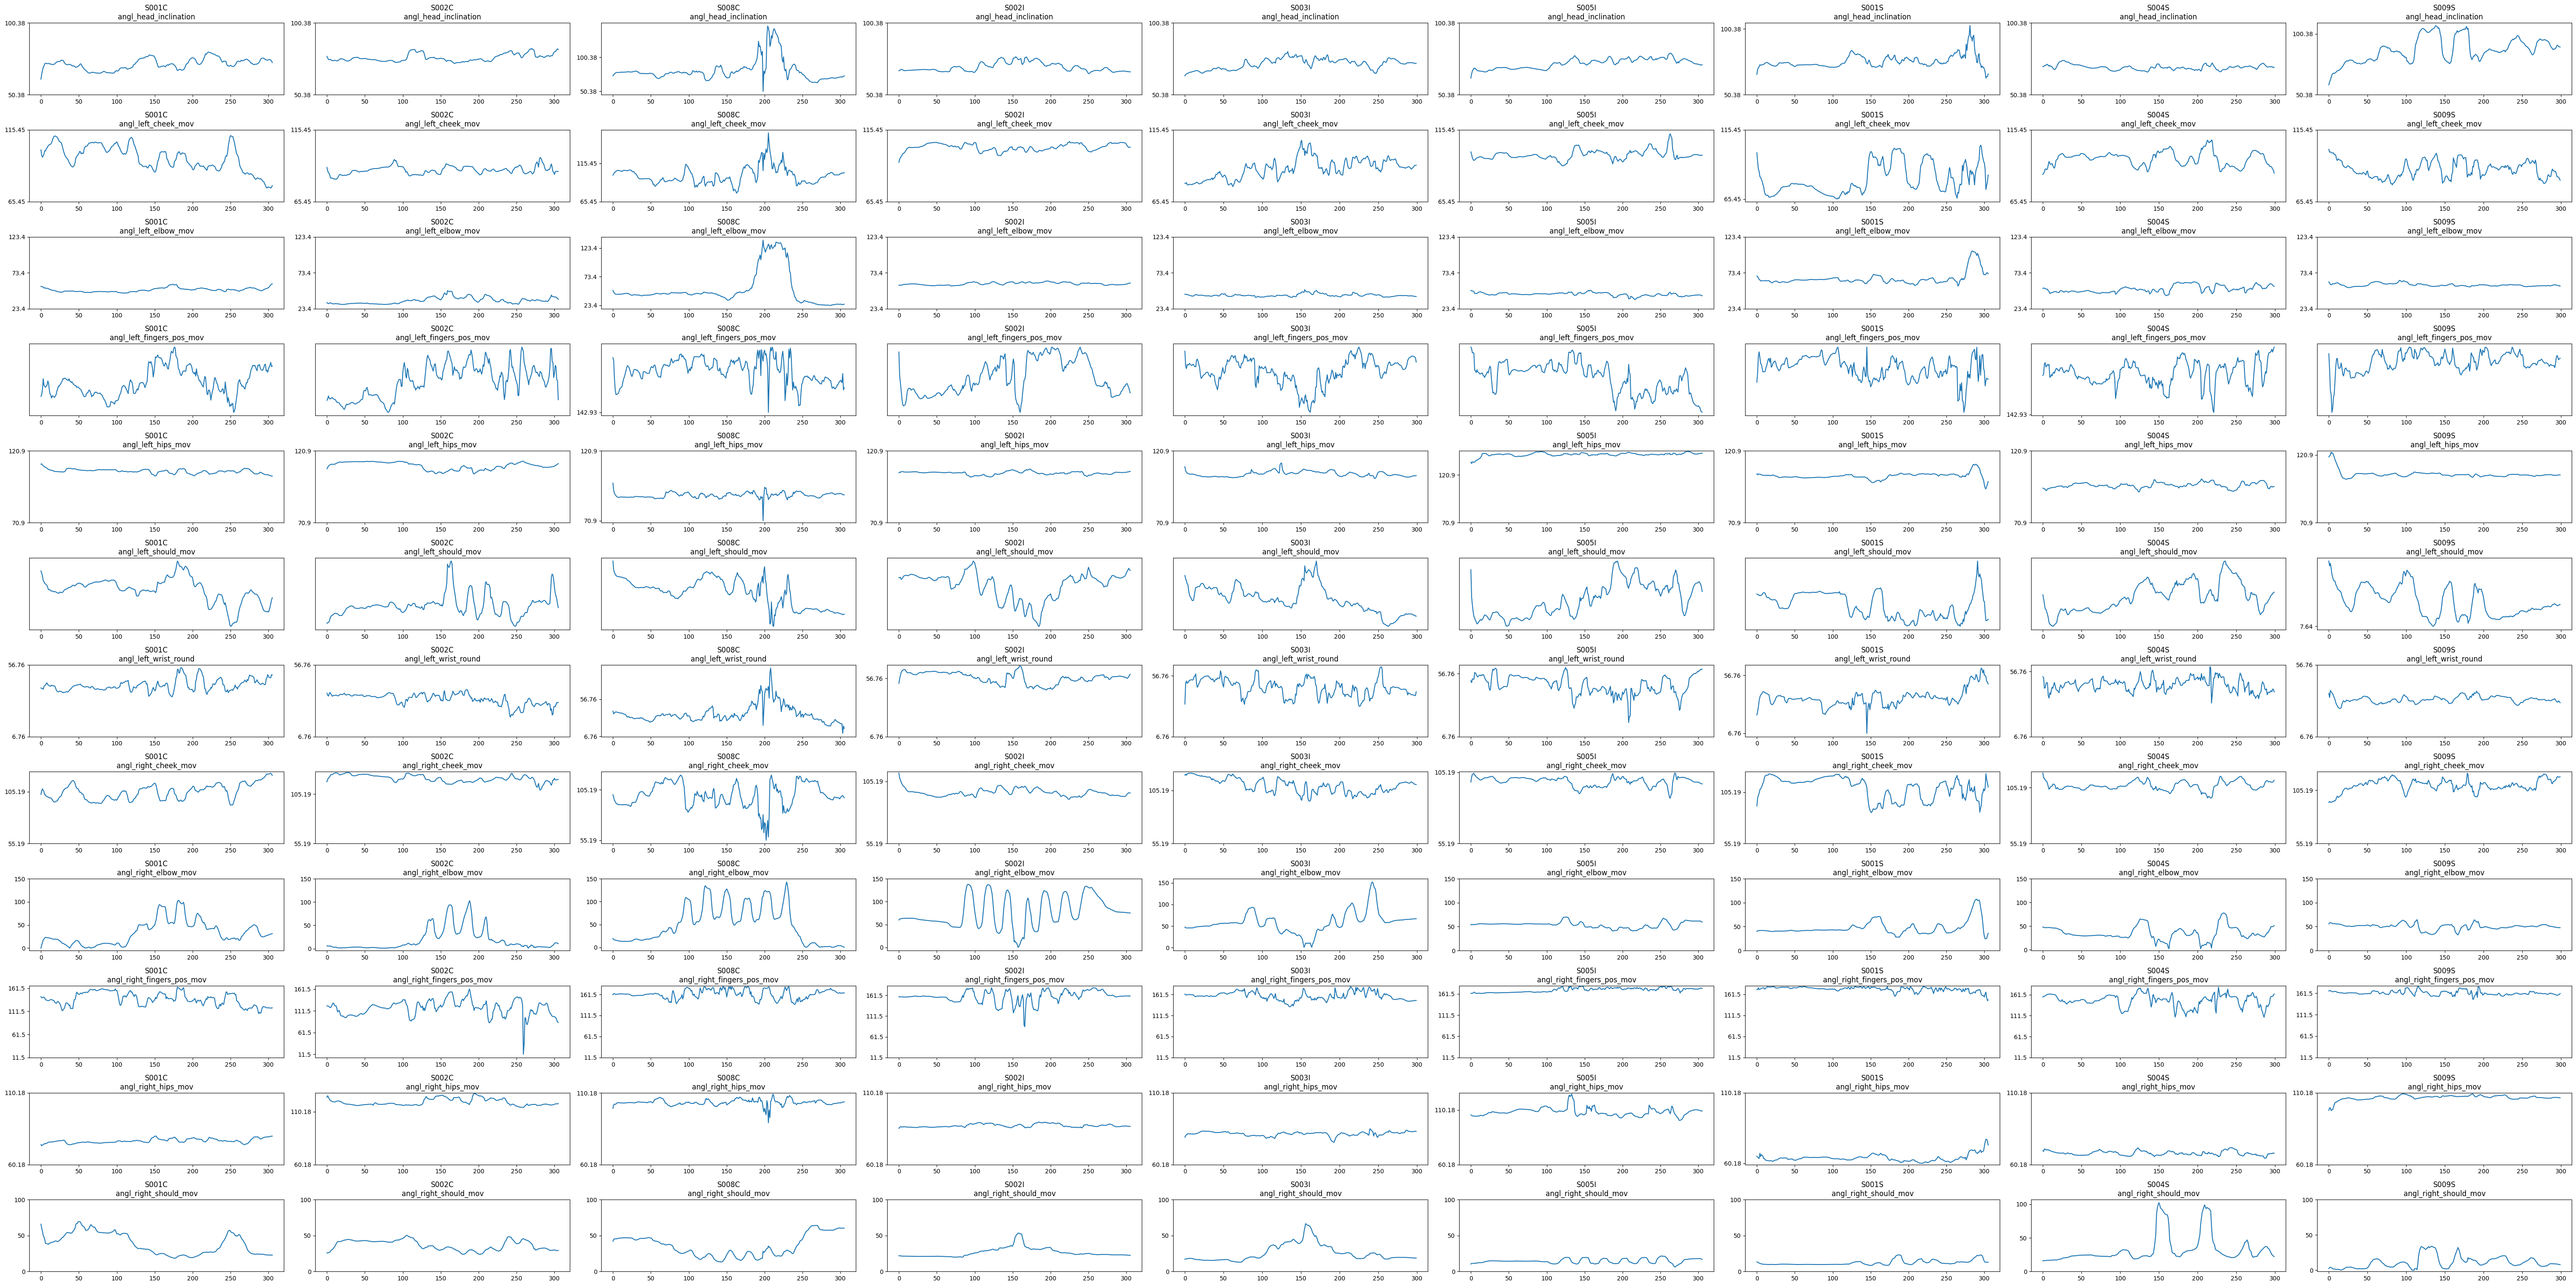

In [77]:
fig, axs = plt.subplots(len(paths_to_csv['S005I']),len(names_of_videos), figsize=(60, 30))
for i in range(len(names_of_videos)):
    for j in range(num_of_metrics):
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        angles = pd.read_csv(curr_path)['angle'].to_list()
        axs[j][i].plot(angles)
        axs[j][i].title.set_text(names_of_videos[i] + "\n" + curr_metric)
        axs[j][i].set_yticks(np.arange(limits_min[j], limits_max[j], step=50))
plt.tight_layout()
plt.savefig("results_consider_angles.png")
plt.show()